In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-for-bank-customers/churn.csv


In [2]:
df=pd.read_csv('../input/churn-for-bank-customers/churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Import required module

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier 

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
#df.corr()

# Exploratory Data Analysis

#### Univariate

In [14]:
num_cols= list(df.select_dtypes(['int64', 'float64']).columns)
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


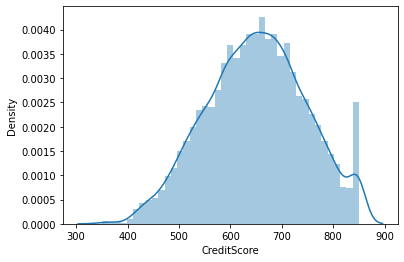

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


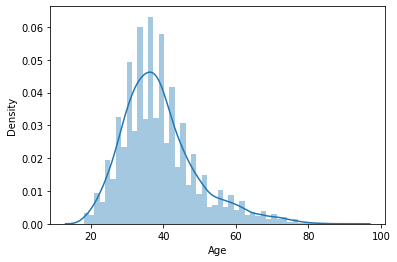

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


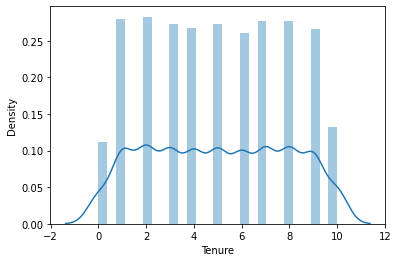

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


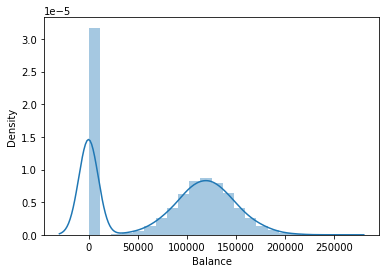

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


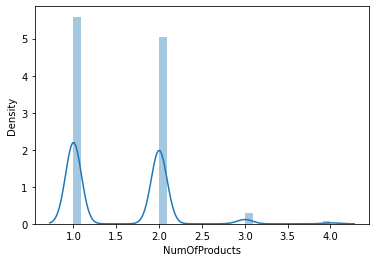

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


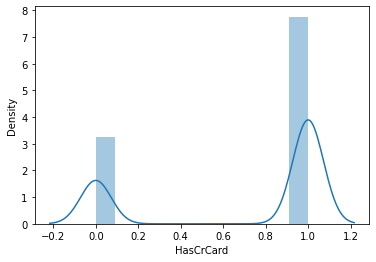

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


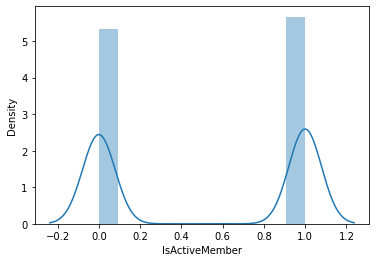

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


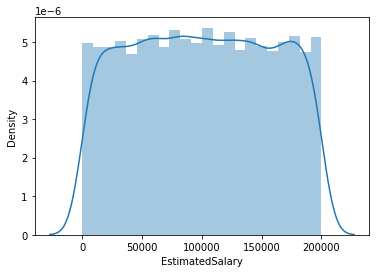

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


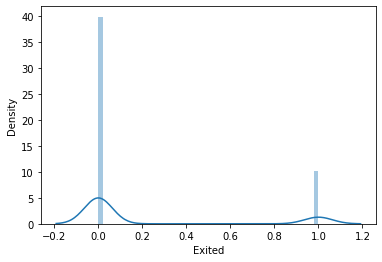

In [15]:
for c in num_cols:
    sns.distplot(df[c])
    plt.show()

#### Numerical to Categorical Transfer

In [16]:
#HasCrCard
df.HasCrCard.replace({1 : 'Yes',0 : 'No'},inplace=True)
#NumOfProducts
df.NumOfProducts.replace({1 : 'One',2 : 'Two',3 : 'Three',4 : 'Four'},inplace=True)
#IsActiveMember
df.IsActiveMember.replace({1 : 'Yes',0 : 'No'},inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [18]:
cat_cols= list(df.select_dtypes(['object']).columns)
cat_cols

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


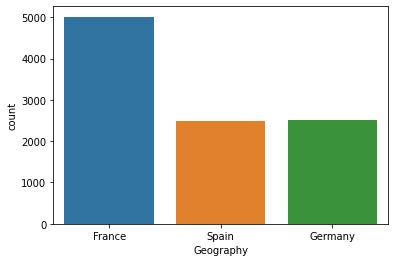

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


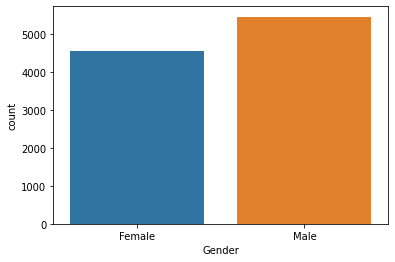

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


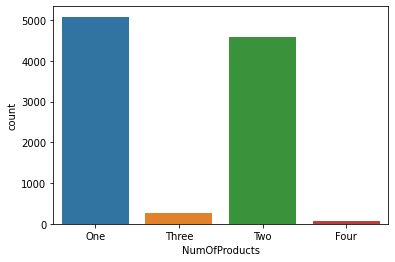

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


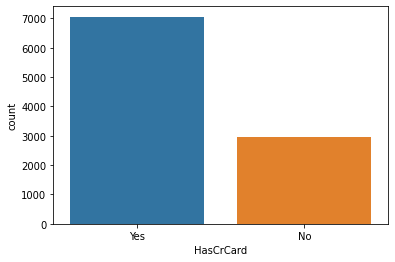

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


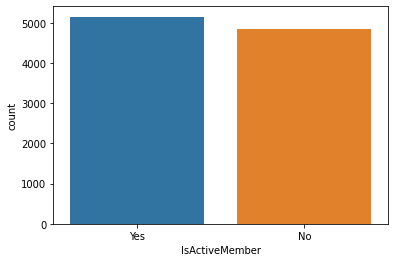

In [19]:
for c in cat_cols:
    sns.countplot(df[c])
    plt.show()

#### Bi-Variate Analysis

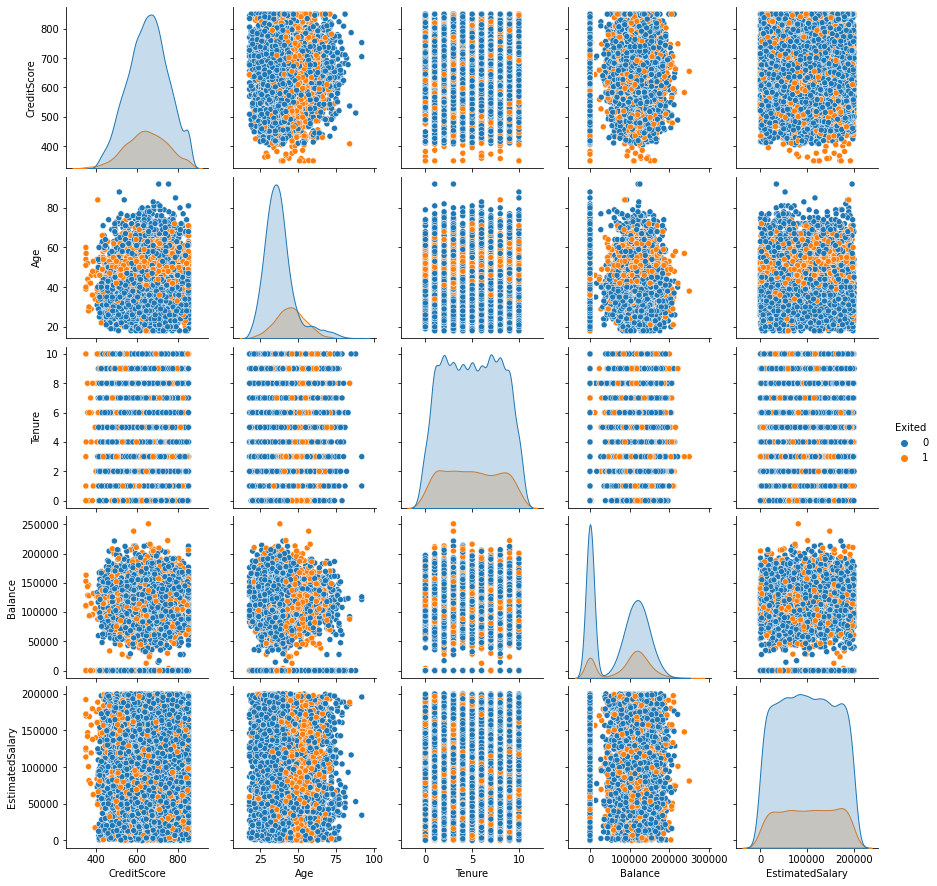

In [20]:
#Pairplot
sns.pairplot(df, hue='Exited')
#sns.pairplot(df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Exited']], hue='Exited')
plt.show()

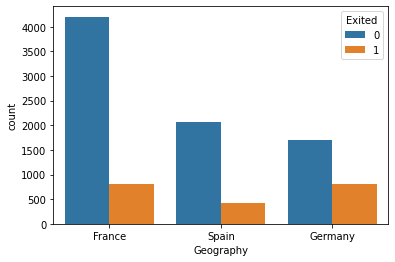

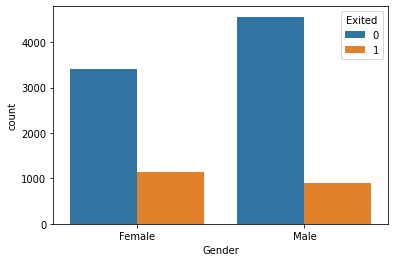

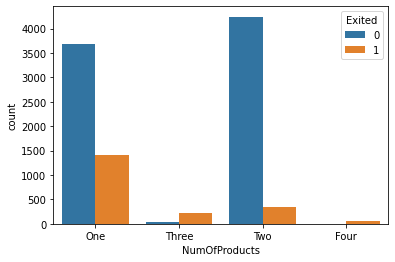

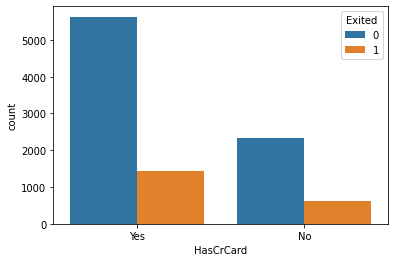

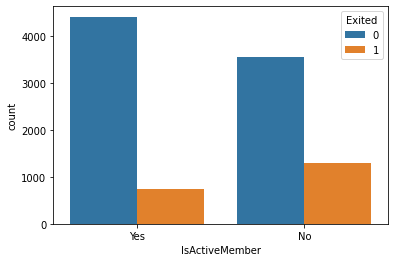

In [21]:
for c in cat_cols:
    sns.countplot(data=df, x= c, hue='Exited')
    plt.show()

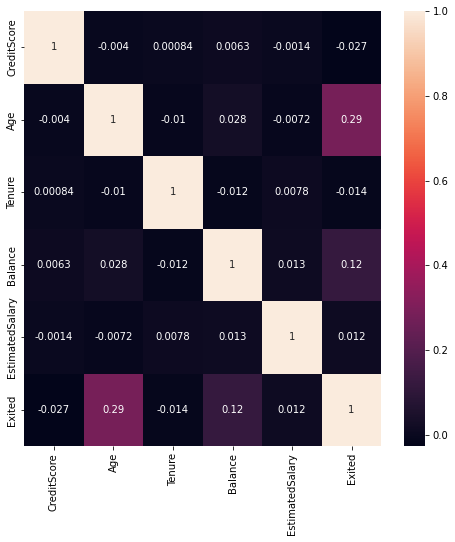

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

There seems to be no strong correlation among variables

#### Outlier Analysis

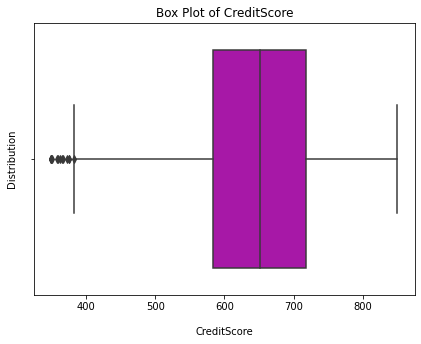

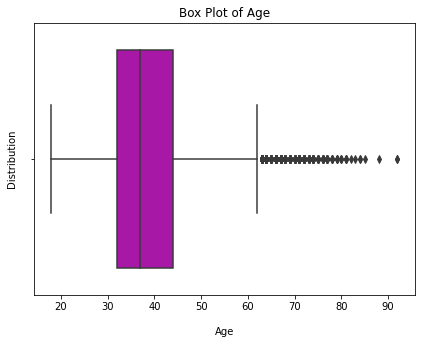

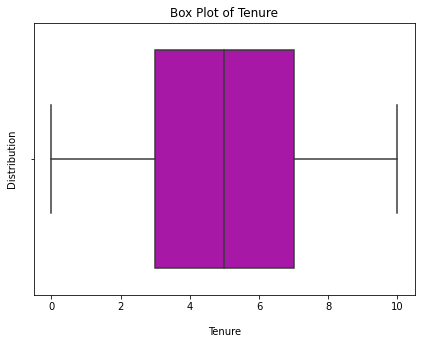

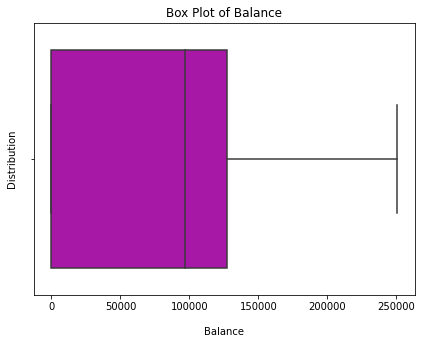

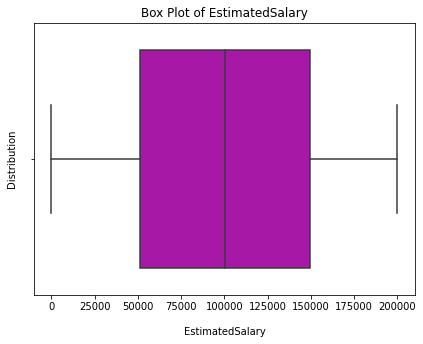

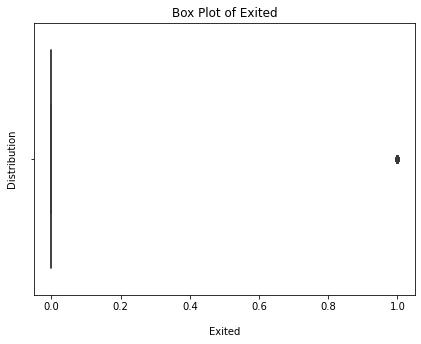

In [23]:
for i in enumerate(df.select_dtypes(exclude=['object']).columns):
    plt.figure(figsize=(15,5))
    
    title_ = "Box Plot of " + str(i[1])
    plt.subplot(1, 2, 2)
    sns.boxplot(x = str(i[1]), data = df, color = 'm')
    plt.title(title_)
    plt.xlabel(str(i[1]), labelpad = 15)
    plt.ylabel("Distribution", labelpad = 10)
    
    plt.show()

Only Age variable seems to have outliers, but these are valid outliers.

In [24]:
#df

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [26]:
len(df[df.CreditScore>845])

257

In [27]:
len(df)

10000

In [28]:
df1=pd.get_dummies(df,drop_first=True)

In [29]:
#df1

## Scaling 

###  1.MinMaxScaler

In [30]:
# Use Scikit-learn for Normalization (MinMaxScaler)
scaler = MinMaxScaler()
scaler.fit(df1)
scaled = scaler.transform(df1)
df_scaled = pd.DataFrame(scaled, columns=df1.columns)
#print(df_scaled)

###  2.StandardScaler


scaler = StandardScaler() 
scaler.fit(df1) 
scaled = scaler.transform(df1) 
df_scaled = pd.DataFrame(scaled, columns=df1.columns)



In [31]:
#df_scaled

In [32]:
x=df_scaled.drop(['Exited'],axis=1)
y=df_scaled.Exited

In [33]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'NumOfProducts_One', 'NumOfProducts_Three', 'NumOfProducts_Two',
       'HasCrCard_Yes', 'IsActiveMember_Yes'],
      dtype='object')

### Feature Importance 

In [34]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[0.11999513 0.23744315 0.10420032 0.12937166 0.11751018 0.02752272
 0.02147882 0.02242859 0.05724839 0.00483005 0.08360957 0.03080198
 0.04355944]


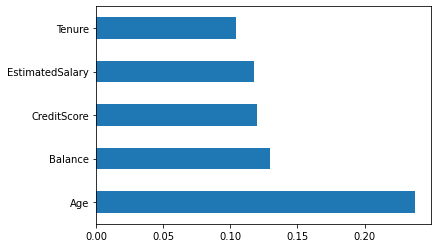

In [36]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### train_test_split

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 13)
(8000,)
(2000, 13)
(2000,)


### Model training  

In [38]:
algo_name = []
accuracy = []

In [39]:
def models(model):
    model = model()
    score = cross_val_score(model, x_train, y_train)
    algo_name.append(model)
    accuracy.append(np.mean(score))
    print(model)
    print(score)
    print('-'*100)
    

In [40]:
model_list=[RandomForestClassifier,KNeighborsClassifier,LogisticRegression,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,DecisionTreeClassifier]

In [41]:
for model in model_list:
    models(model)

RandomForestClassifier()
[0.87125  0.861875 0.865625 0.865625 0.868125]
----------------------------------------------------------------------------------------------------
KNeighborsClassifier()
[0.821875 0.821875 0.82375  0.825625 0.836875]
----------------------------------------------------------------------------------------------------
LogisticRegression()
[0.838125 0.84125  0.840625 0.8425   0.850625]
----------------------------------------------------------------------------------------------------
AdaBoostClassifier()
[0.853125 0.848125 0.8475   0.855    0.858125]
----------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
[0.868125 0.863125 0.858125 0.8625   0.87    ]
----------------------------------------------------------------------------------------------------
BaggingClassifier()
[0.8475   0.84     0.850625 0.8425   0.85625 ]
--------------------------------------------------------------------------

In [42]:
#algo_name

In [43]:
#accuracy

In [44]:
acc = pd.DataFrame({"Algorithm":algo_name, "Accuracy":accuracy})
acc
acc = acc.sort_values(by='Accuracy',ascending=False)
print(acc)

                      Algorithm  Accuracy
0      RandomForestClassifier()  0.866500
4  GradientBoostingClassifier()  0.864375
6        ExtraTreesClassifier()  0.856125
3          AdaBoostClassifier()  0.852375
5           BaggingClassifier()  0.847375
2          LogisticRegression()  0.842625
1        KNeighborsClassifier()  0.826000
7      DecisionTreeClassifier()  0.794750


MAE: 0.1395
MSE: 0.1395
RMSE: 0.37349698793966196
----------------------------------------
Accuracy score:
0.8605
----------------------------------------
Confusion Matrix:
[[1538   50]
 [ 229  183]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1588
         1.0       0.79      0.44      0.57       412

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



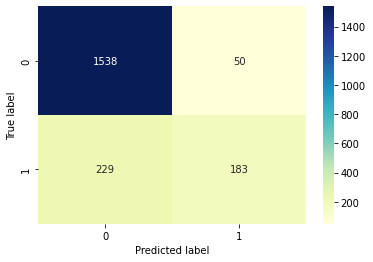

In [45]:
model = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=1)
model.fit(x_train,y_train)
#with open('titanic_svc_model.pkl','wb') as file:
   # pickle.dump(lo,file)
y_predicted=model.predict(x_test)
model.score(x_test,y_test)
s=confusion_matrix(y_test, y_predicted, labels=None, sample_weight=None)
#print(s)
sns.heatmap(pd.DataFrame(s), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
#acc_score = accuracy_score(y_test,y_predicted)
#print(acc_score)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_predicted))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_predicted))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,y_predicted))

# Handling Imbalanced data

### Undersampling

#### 1. NearMiss

#### 2. RandomUnderSampler

### Over Sampling

#### 1. RandomOverSampler

In [46]:
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(1)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))
print(x_train_ns.shape,x_train.shape,y_train_ns.shape,y_train.shape)

The number of classes before fit Counter({0.0: 6375, 1.0: 1625})
The number of classes after fit Counter({1.0: 6375, 0.0: 6375})
(12750, 13) (8000, 13) (12750,) (8000,)


/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:590: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


#### 2. SMOTETomek

#### 3 . Ensemble Techniques

In [47]:
algo_name = []
accuracy = []
def models(model):
    model = model()
    score = cross_val_score(model, x_train_ns, y_train_ns)
    algo_name.append(model)
    accuracy.append(np.mean(score))
    print(model)
    print(score)
    print('-'*100)
    

In [48]:
for model in model_list:
    models(model)

RandomForestClassifier()
[0.95294118 0.95215686 0.96431373 0.95843137 0.95960784]
----------------------------------------------------------------------------------------------------
KNeighborsClassifier()
[0.80470588 0.81137255 0.81843137 0.80117647 0.80509804]
----------------------------------------------------------------------------------------------------
LogisticRegression()
[0.76470588 0.76509804 0.76313725 0.75215686 0.75098039]
----------------------------------------------------------------------------------------------------
AdaBoostClassifier()
[0.77843137 0.76784314 0.7654902  0.76078431 0.77333333]
----------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
[0.79764706 0.80862745 0.80666667 0.79490196 0.80313725]
----------------------------------------------------------------------------------------------------
BaggingClassifier()
[0.94078431 0.94392157 0.95529412 0.95607843 0.95058824]
--------------

In [49]:
acc = pd.DataFrame({"Algorithm":algo_name, "Accuracy":accuracy})
acc = acc.sort_values(by='Accuracy',ascending=False)
print(acc)

                      Algorithm  Accuracy
6        ExtraTreesClassifier()  0.970745
0      RandomForestClassifier()  0.957490
5           BaggingClassifier()  0.949333
7      DecisionTreeClassifier()  0.923216
1        KNeighborsClassifier()  0.808157
4  GradientBoostingClassifier()  0.802196
3          AdaBoostClassifier()  0.769176
2          LogisticRegression()  0.759216


MAE: 0.142
MSE: 0.142
RMSE: 0.37682887362833545
----------------------------------------
Accuracy score:
0.858
----------------------------------------
Confusion Matrix:
[[1536   52]
 [ 232  180]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1588
         1.0       0.78      0.44      0.56       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



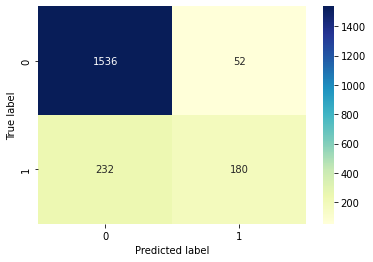

In [50]:
model = ExtraTreesClassifier()
model.fit(x_train_ns,y_train_ns)
#with open('titanic_svc_model.pkl','wb') as file:
   # pickle.dump(lo,file)
y_predicted=model.predict(x_test)
model.score(x_test,y_test)
s=confusion_matrix(y_test, y_predicted, labels=None, sample_weight=None)
#print(s)
sns.heatmap(pd.DataFrame(s), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
#acc_score = accuracy_score(y_test,y_predicted)
#print(acc_score)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_predicted))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_predicted))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,y_predicted))

## Calculated  Optimal Threshold value and Train model

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
def model_optimun(model):
    model_name=model
    print(model_name)
    model = model()
    model.fit(x_train_ns, y_train_ns)
    ytrain_pred = model.predict_proba(x_train_ns)
    print('RF train roc-auc: {}'.format(roc_auc_score(y_train_ns, ytrain_pred[:,1])))
    ytest_pred = model.predict_proba(x_test)
    print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
    print('-'*150)

In [53]:
for model in model_list:
    model_optimun(model)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RF train roc-auc: 1.0
RF test roc-auc: 0.8479792313712065
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
RF train roc-auc: 0.9757825082660516
RF test roc-auc: 0.7537821586657212
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
RF train roc-auc: 0.8366498300653593
RF test roc-auc: 0.8236363136142428
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
RF train roc-auc: 0.8580440753556324
RF test roc-auc: 0.8385333875424912
------------------------

In [54]:
pred=[]
#for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
for model in model_list:
    model=model()
    model.fit(x_train_ns, y_train_ns)
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8413480350199312


In [55]:
#pd.concat(pred,axis=1)

In [56]:
#final_prediction

In [57]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
#thresholds

In [58]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
95,0.604987,0.8510
58,0.671895,0.8505
96,0.604257,0.8505
94,0.606038,0.8505
56,0.684126,0.8505


In [59]:
thresold=accuracy_ls.iloc[0,0]
thresold

0.6049873540996211

In [60]:
#accuracy_ls

In [61]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

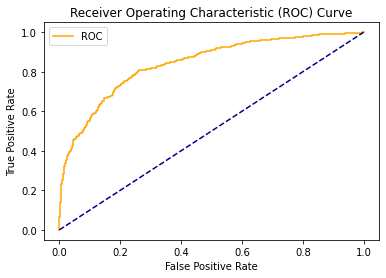

In [62]:
plot_roc_curve(fpr,tpr)

## After using optimum threshold probability Value

In [63]:
algo_name = []
accuracy = []
def model_optimun(model):
    #print(model)
    model = model()
    model.fit(x_train_ns, y_train_ns)
    ytest_pred = model.predict_proba(x_test)
    #print(ytest_pred)
    ytest_pred=[1 if y[1] > thresold else 0 for y in ytest_pred]
    #print(ytest_pred)
    score= roc_auc_score(y_test, ytest_pred)
    #print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred)))
    algo_name.append(model)
    accuracy.append(score)


In [64]:
for model in model_list:
    model_optimun(model)

In [65]:
algo_name

[RandomForestClassifier(),
 KNeighborsClassifier(),
 LogisticRegression(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 BaggingClassifier(),
 ExtraTreesClassifier(),
 DecisionTreeClassifier()]

In [66]:
accuracy

[0.6974884448900736,
 0.6773128561297108,
 0.7318786530043285,
 0.5,
 0.7756260546330488,
 0.689439607737644,
 0.6638288376415348,
 0.657403218312098]

In [67]:
acc = pd.DataFrame({"Algorithm":algo_name, "Accuracy":accuracy})
acc = acc.sort_values(by='Accuracy',ascending=False)
print(acc)

                                           Algorithm  Accuracy
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.775626
2                               LogisticRegression()  0.731879
0  (DecisionTreeClassifier(max_features='auto', r...  0.697488
5  (DecisionTreeClassifier(random_state=124955226...  0.689440
1                             KNeighborsClassifier()  0.677313
6  (ExtraTreeClassifier(random_state=1388902639),...  0.663829
7                           DecisionTreeClassifier()  0.657403
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.500000


MAE: 0.1565
MSE: 0.1565
RMSE: 0.3956008088970496
----------------------------------------
Accuracy score:
0.8435
----------------------------------------
roc_auc_score score:
0.7756260546330488
----------------------------------------
Confusion Matrix:
[[1415  173]
 [ 140  272]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1588
         1.0       0.61      0.66      0.63       412

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.85      2000



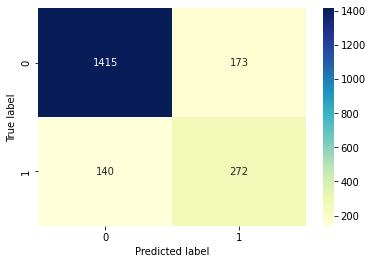

In [68]:
model = GradientBoostingClassifier()
model.fit(x_train_ns,y_train_ns)
#with open('titanic_svc_model.pkl','wb') as file:
   # pickle.dump(lo,file)
#y_predicted=model.predict(x_test)
ytest_pred = model.predict_proba(x_test)
#print(ytest_pred)
y_predicted=[1 if y[1] > thresold else 0 for y in ytest_pred]
model.score(x_test,y_test)
s=confusion_matrix(y_test, y_predicted, labels=None, sample_weight=None)
#print(s)
sns.heatmap(pd.DataFrame(s), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
#acc_score = accuracy_score(y_test,y_predicted)
#print(acc_score)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_predicted))
print ('-'*40)
print ('roc_auc_score score:')
print (roc_auc_score(y_test,y_predicted))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_predicted))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,y_predicted))


## After Hyperparameter Tuning for GradientBoostingClassifier

In [69]:
random_grid= {'loss':['deviance', 'exponential'],'n_estimators': [50,100,150,200],
                       'learning_rate':[0.01,0.1],'subsample':[0.5,1.0,],'criterion' : ['friedman_mse'],
                       'min_samples_split':[2],'min_samples_leaf':[1,2,3],'max_depth':[3,7]
            }

In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model= GradientBoostingClassifier(),

In [71]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
model_random = RandomizedSearchCV(estimator =GradientBoostingClassifier(), param_distributions = random_grid,n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [72]:
model_random.fit(x_train_ns,y_train_ns)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150, subsample=1.0; total time=   4.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150, subsample=1.0; total time=   4.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150, subsample=1.0; total time=   4.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150, subsample=1.0; total time=   4.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150, subsample=1.0; total time=   4.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, ma

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['friedman_mse'],
                                        'learning_rate': [0.01, 0.1],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 7],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.5, 1.0]},
                   random_state=42, verbose=2)

In [73]:
model_random.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 7,
 'loss': 'deviance',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

MAE: 0.1545
MSE: 0.1545
RMSE: 0.3930648801406709
----------------------------------------
Accuracy score:
0.8455
----------------------------------------
roc_auc_score score:
0.7220629233816732
----------------------------------------
Confusion Matrix:
[[1480  108]
 [ 201  211]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      1588
         1.0       0.66      0.51      0.58       412

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



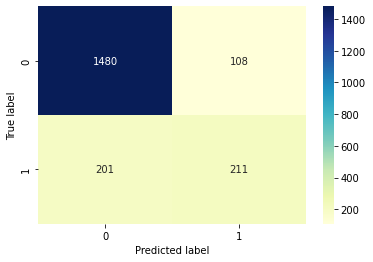

In [74]:
model = GradientBoostingClassifier(subsample= 0.5,
 n_estimators= model_random.best_params_['n_estimators'],
 min_samples_split= model_random.best_params_['min_samples_split'],
 min_samples_leaf= model_random.best_params_['min_samples_leaf'],
 max_depth= model_random.best_params_['max_depth'],
 loss= model_random.best_params_['loss'],
 learning_rate= model_random.best_params_['learning_rate'],
 criterion= model_random.best_params_['criterion'])
model.fit(x_train_ns,y_train_ns)
#with open('titanic_svc_model.pkl','wb') as file:
   # pickle.dump(lo,file)
#y_predicted=model.predict(x_test)
ytest_pred = model.predict_proba(x_test)
#print(ytest_pred)
y_predicted=[1 if y[1] > thresold else 0 for y in ytest_pred]
model.score(x_test,y_test)
s=confusion_matrix(y_test, y_predicted, labels=None, sample_weight=None)
#print(s)
sns.heatmap(pd.DataFrame(s), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
#acc_score = accuracy_score(y_test,y_predicted)
#print(acc_score)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_predicted))
print ('-'*40)
print ('roc_auc_score score:')
print (roc_auc_score(y_test,y_predicted))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_predicted))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,y_predicted))